# **Human Activity Recognition**

#### Student Id: 31531351 
#### Name: Hyungkyu Lim 

## Data Preprocessiong


#### Import Data
 Split train and test data (In this step, I merged subject and activity columns with train and test data to use it for EDA later.)
 The obtained dataset has been randomly partitioned into two sets, where 79.5%(Subject 1-22) of the volunteers was selected for generating the training data and 29.5%(Subject 23-30) the test data. 



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('~/Desktop/DSC483/miniproject/DataSet_HAR.csv')

In [6]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [7]:
df.isnull().values.any() #No missing data in df

False

In [8]:
df = pd.DataFrame(df, columns=df.columns).sort_values(by='subject', ascending=True)

In [9]:
y= df.Activity

In [10]:
label_encoder = LabelEncoder() # encoding target variable as numerical value

label_encoder = label_encoder.fit(y)

y = label_encoder.transform(y)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.295, shuffle=False,random_state = 7 )

In [13]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
236,0.274262,-0.012265,-0.109494,-0.993865,-0.977421,-0.989336,-0.995502,-0.975182,-0.989586,-0.938716,...,-0.836165,0.103368,0.054563,0.303959,0.306739,-0.734018,0.001672,-0.147169,1,SITTING
235,0.277258,-0.014249,-0.112205,-0.997016,-0.977680,-0.997140,-0.997566,-0.974858,-0.996730,-0.941152,...,-0.947858,0.055624,0.418967,0.271453,-0.288318,-0.733947,0.003017,-0.148072,1,SITTING
234,0.277782,-0.015874,-0.110504,-0.996929,-0.981925,-0.996716,-0.997586,-0.979271,-0.995642,-0.941152,...,-0.847757,0.029769,0.190546,0.036059,-0.111374,-0.733537,0.003606,-0.148774,1,SITTING
233,0.275549,-0.014115,-0.108999,-0.997599,-0.985257,-0.995653,-0.997931,-0.982909,-0.995529,-0.944120,...,-0.806363,0.102840,-0.797698,-0.276761,0.015448,-0.734412,0.004690,-0.148719,1,SITTING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,0.298161,-0.008347,-0.077776,-0.094914,0.128507,-0.296885,-0.106885,-0.078749,-0.347701,0.015725,...,0.390564,-0.212105,0.308947,0.888189,0.695890,-0.764842,0.249581,-0.042833,22,WALKING
4477,0.306059,-0.001526,-0.122492,-0.067882,0.116780,-0.248007,-0.072135,-0.089027,-0.259189,-0.039147,...,0.376569,-0.206140,-0.191134,0.028665,0.537481,-0.771100,0.246353,-0.039113,22,WALKING
4476,0.299339,-0.025286,-0.138511,0.018299,0.020880,-0.222485,0.014163,-0.102527,-0.202713,0.182728,...,0.404197,-0.241223,-0.294481,0.141142,-0.475703,-0.765220,0.248364,-0.045267,22,WALKING
4475,0.283356,-0.029424,-0.105184,0.045132,-0.028044,-0.213165,0.042369,-0.118854,-0.230445,0.182728,...,0.260296,-0.258727,0.423697,0.451729,0.010066,-0.758428,0.250714,-0.051856,22,WALKING


In [14]:
print (X_train.shape, y_train.shape)

(7260, 563) (7260,)


In [15]:
print (X_test.shape, y_test.shape)

(3039, 563) (3039,)


In [16]:
train = X_train
train['Activity'] = y_train

In [17]:
test = X_test
test['Activity'] = y_test

In [19]:
y_test

array([2, 2, 2, ..., 3, 5, 5])

#### Modify colunm's name (Removing '()' , ',' and change '-' to '_')

In [14]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','_')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'fBodyBodyGyroJerkMag_kurtosis', 'angletBodyAccMean_gravity',
       'angletBodyAccJerkMean_gravityMean', 'angletBodyGyroMean_gravityMean',
       'angletBodyGyroJerkMean_gravityMean', 'angleX_gravityMean',
       'angleY_gravityMean', 'angleZ_gravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## EDA Part 

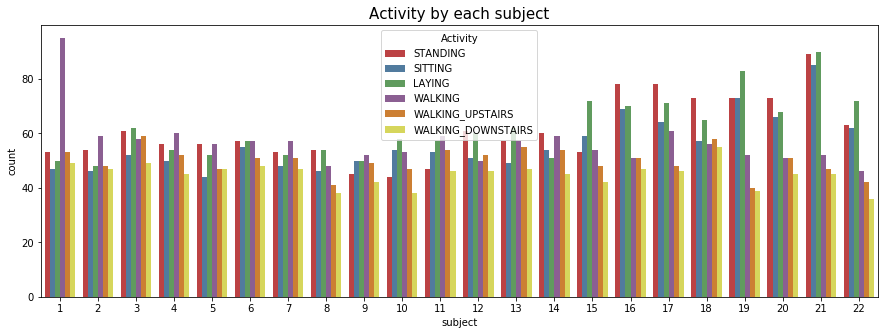

In [25]:
plt.figure(figsize=(15,5))
plt.title('Activity by each subject', fontsize=15)
sns.countplot(x='subject',hue='Activity', data = train)
#plt.savefig('eda1.png',dpi=60)
plt.show()


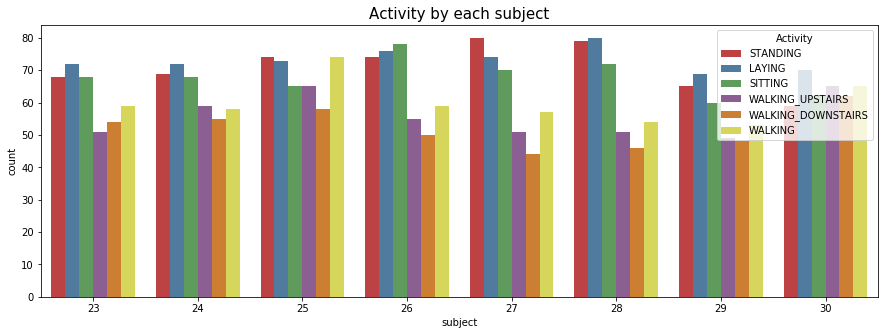

In [24]:
plt.figure(figsize=(15,5))
plt.title('Activity by each subject', fontsize=15)
sns.countplot(x='subject',hue='Activity', data = test)
#plt.savefig('eda2.png',dpi=60)
plt.show()

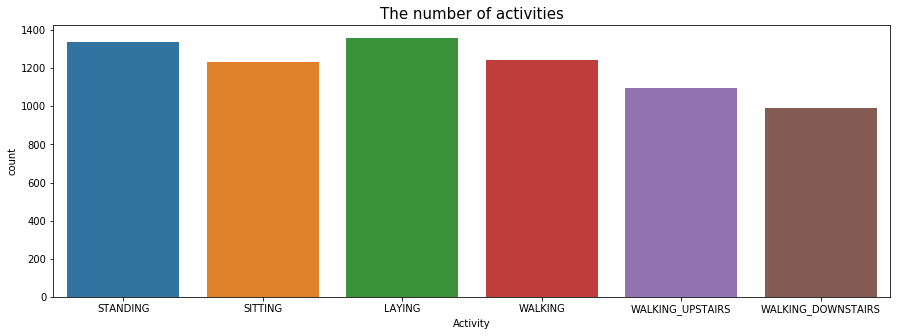

In [15]:
plt.figure(figsize=(15,5))
plt.title('The number of activities', fontsize=15)
sns.countplot(train.Activity)
#plt.savefig('eda3.png',dpi=60)
plt.show()

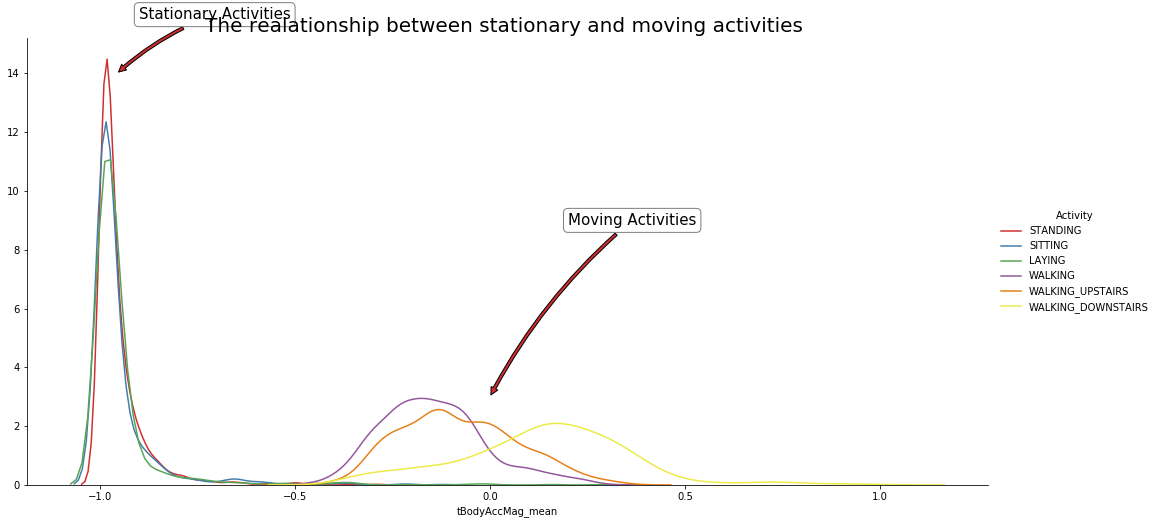

In [16]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=7,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False).add_legend()
plt.annotate("Stationary Activities",bbox=dict(boxstyle="round", fc="none", ec="gray"), xy=(-0.956,14), xytext=(-0.9, 16), size=15,\
            va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",bbox=dict(boxstyle="round", fc="none", ec="gray"), xy=(0,3), xytext=(0.2,9), size=15,\
            va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('The realationship between stationary and moving activities ', fontsize=20)
plt.show()

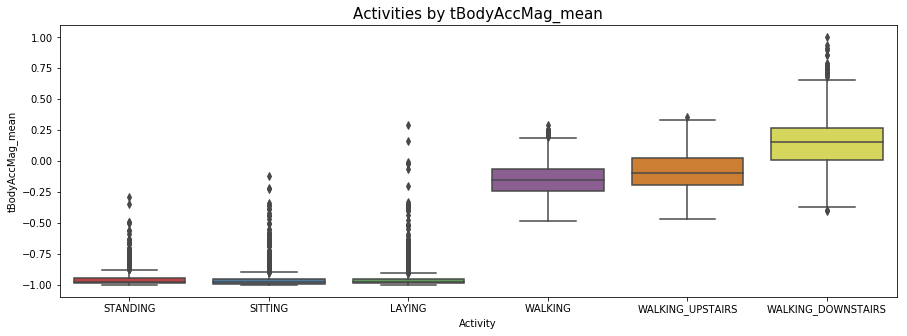

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'Activity' , y = 'tBodyAccMag_mean', data= train)
plt.title('Activities by tBodyAccMag_mean', fontsize = 15)
plt.show()

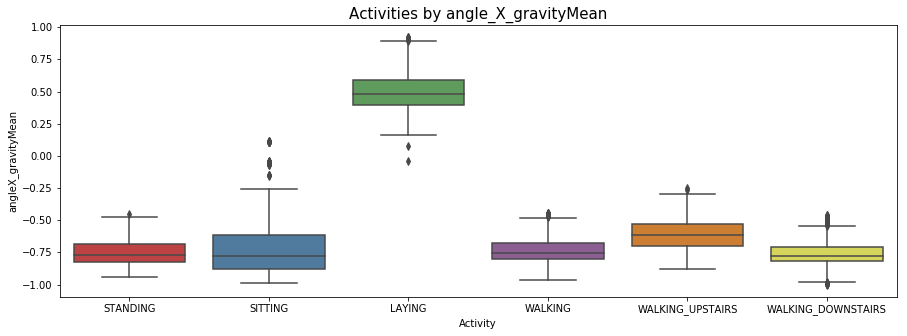

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'Activity' , y = 'angleX_gravityMean', data= train)
plt.title('Activities by angle_X_gravityMean', fontsize = 15)
#plt.savefig('eda4.png',dpi=60)
plt.show()

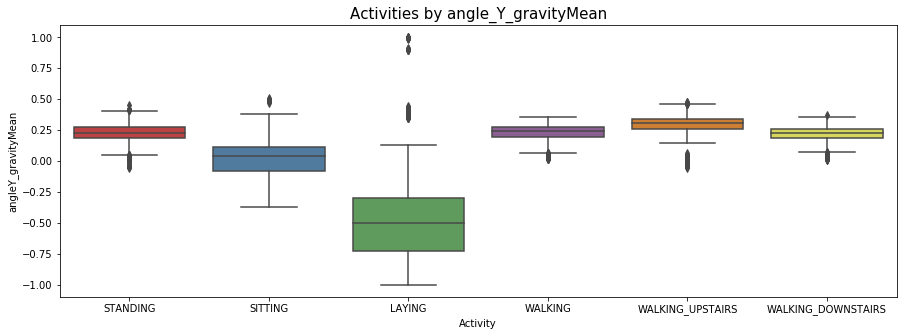

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'Activity' , y = 'angleY_gravityMean', data= train)
plt.title('Activities by angle_Y_gravityMean', fontsize = 15)
#plt.savefig('eda5.png',dpi=60)
plt.show()

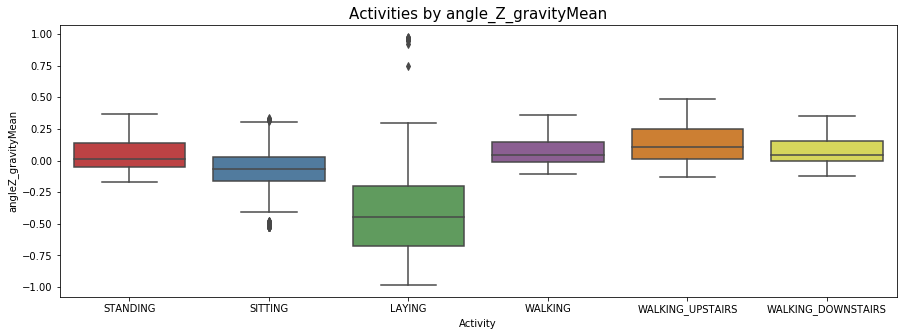

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'Activity' , y = 'angleZ_gravityMean', data= train)
plt.title('Activities by angle_Z_gravityMean', fontsize = 15)
#plt.savefig('eda6.png',dpi=60)
plt.show()

## Objective1


In [15]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [16]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

In [17]:
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [18]:
class_names = labels

### Function for confusion matrix

In [18]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(15,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### 1. XGBoost (Accuracy and confusion matrix) including log loss and classification error for train and test data

In [19]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric=["merror","mlogloss"], eval_set=eval_set,verbose =1 )

[0]	validation_0-merror:0.081405	validation_0-mlogloss:1.56881	validation_1-merror:0.097071	validation_1-mlogloss:1.5784
[1]	validation_0-merror:0.067493	validation_0-mlogloss:1.39271	validation_1-merror:0.086871	validation_1-mlogloss:1.41483
[2]	validation_0-merror:0.058953	validation_0-mlogloss:1.24755	validation_1-merror:0.080619	validation_1-mlogloss:1.28364
[3]	validation_0-merror:0.057163	validation_0-mlogloss:1.13006	validation_1-merror:0.076341	validation_1-mlogloss:1.1756
[4]	validation_0-merror:0.05427	validation_0-mlogloss:1.02624	validation_1-merror:0.077328	validation_1-mlogloss:1.07992
[5]	validation_0-merror:0.054132	validation_0-mlogloss:0.93717	validation_1-merror:0.07667	validation_1-mlogloss:1.00084
[6]	validation_0-merror:0.05551	validation_0-mlogloss:0.859449	validation_1-merror:0.080619	validation_1-mlogloss:0.928769
[7]	validation_0-merror:0.054821	validation_0-mlogloss:0.790694	validation_1-merror:0.081606	validation_1-mlogloss:0.868918
[8]	validation_0-merror:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
y_pred = xgb_model.predict(X_test)

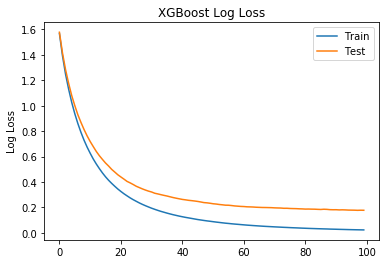

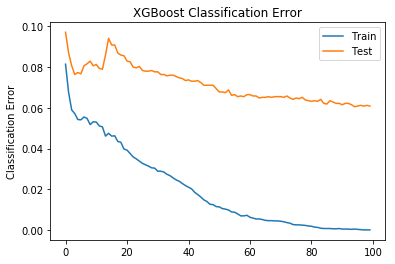

In [21]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#### Model stopped training at epoch 3 (close to what we expected by our manual judgment of learning curves) and that the model with the best loss was observed at epoch 100.

In [196]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train,early_stopping_rounds=20, eval_metric=["merror"], eval_set=eval_set,verbose =1 )

[0]	validation_0-merror:0.081405	validation_1-merror:0.097071
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.067493	validation_1-merror:0.086871
[2]	validation_0-merror:0.058953	validation_1-merror:0.080619
[3]	validation_0-merror:0.057163	validation_1-merror:0.076341
[4]	validation_0-merror:0.05427	validation_1-merror:0.077328
[5]	validation_0-merror:0.054132	validation_1-merror:0.07667
[6]	validation_0-merror:0.05551	validation_1-merror:0.080619
[7]	validation_0-merror:0.054821	validation_1-merror:0.081606
[8]	validation_0-merror:0.051791	validation_1-merror:0.082922
[9]	validation_0-merror:0.053168	validation_1-merror:0.080619
[10]	validation_0-merror:0.05303	validation_1-merror:0.081277
[11]	validation_0-merror:0.051102	validation_1-merror:0.079302
[12]	validation_0-merror:0.050689	validation_1-merror:0.078973
[13]	validation_0-merror:0.04614

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### As epoch increses, log loss decreases

In [195]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train,early_stopping_rounds=10, eval_metric=["mlogloss"], eval_set=eval_set,verbose =False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### XGBclassifier using softprob gives predicted probability of each data point belonging to each class(Sitting, laying, standing, walking, walking_downstairs, walking_upstairs) and each one is encoded as 0 to 5. 

In [27]:
xgb_model.predict_proba(X_test)

array([[4.6517837e-04, 7.7427989e-01, 2.2274482e-01, 5.6322617e-04,
        1.3687792e-03, 5.7812216e-04],
       [7.7757973e-04, 5.9132248e-01, 4.0488070e-01, 1.0850909e-03,
        8.5702789e-04, 1.0770723e-03],
       [6.2906602e-04, 8.1954700e-01, 1.7739023e-01, 9.9156669e-04,
        6.9942535e-04, 7.4269838e-04],
       ...,
       [5.6951772e-05, 4.3074178e-04, 2.1800824e-04, 9.9570066e-01,
        2.4787252e-04, 3.3457305e-03],
       [3.1852964e-04, 1.4346013e-03, 2.0912718e-03, 7.9289888e-04,
        2.0113932e-03, 9.9335128e-01],
       [1.0507033e-04, 3.7601701e-04, 5.3444470e-04, 8.3939108e-04,
        2.7488342e-03, 9.9539620e-01]], dtype=float32)

In [193]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

0.9391247120763409

In [194]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

185

#### Feature Importance

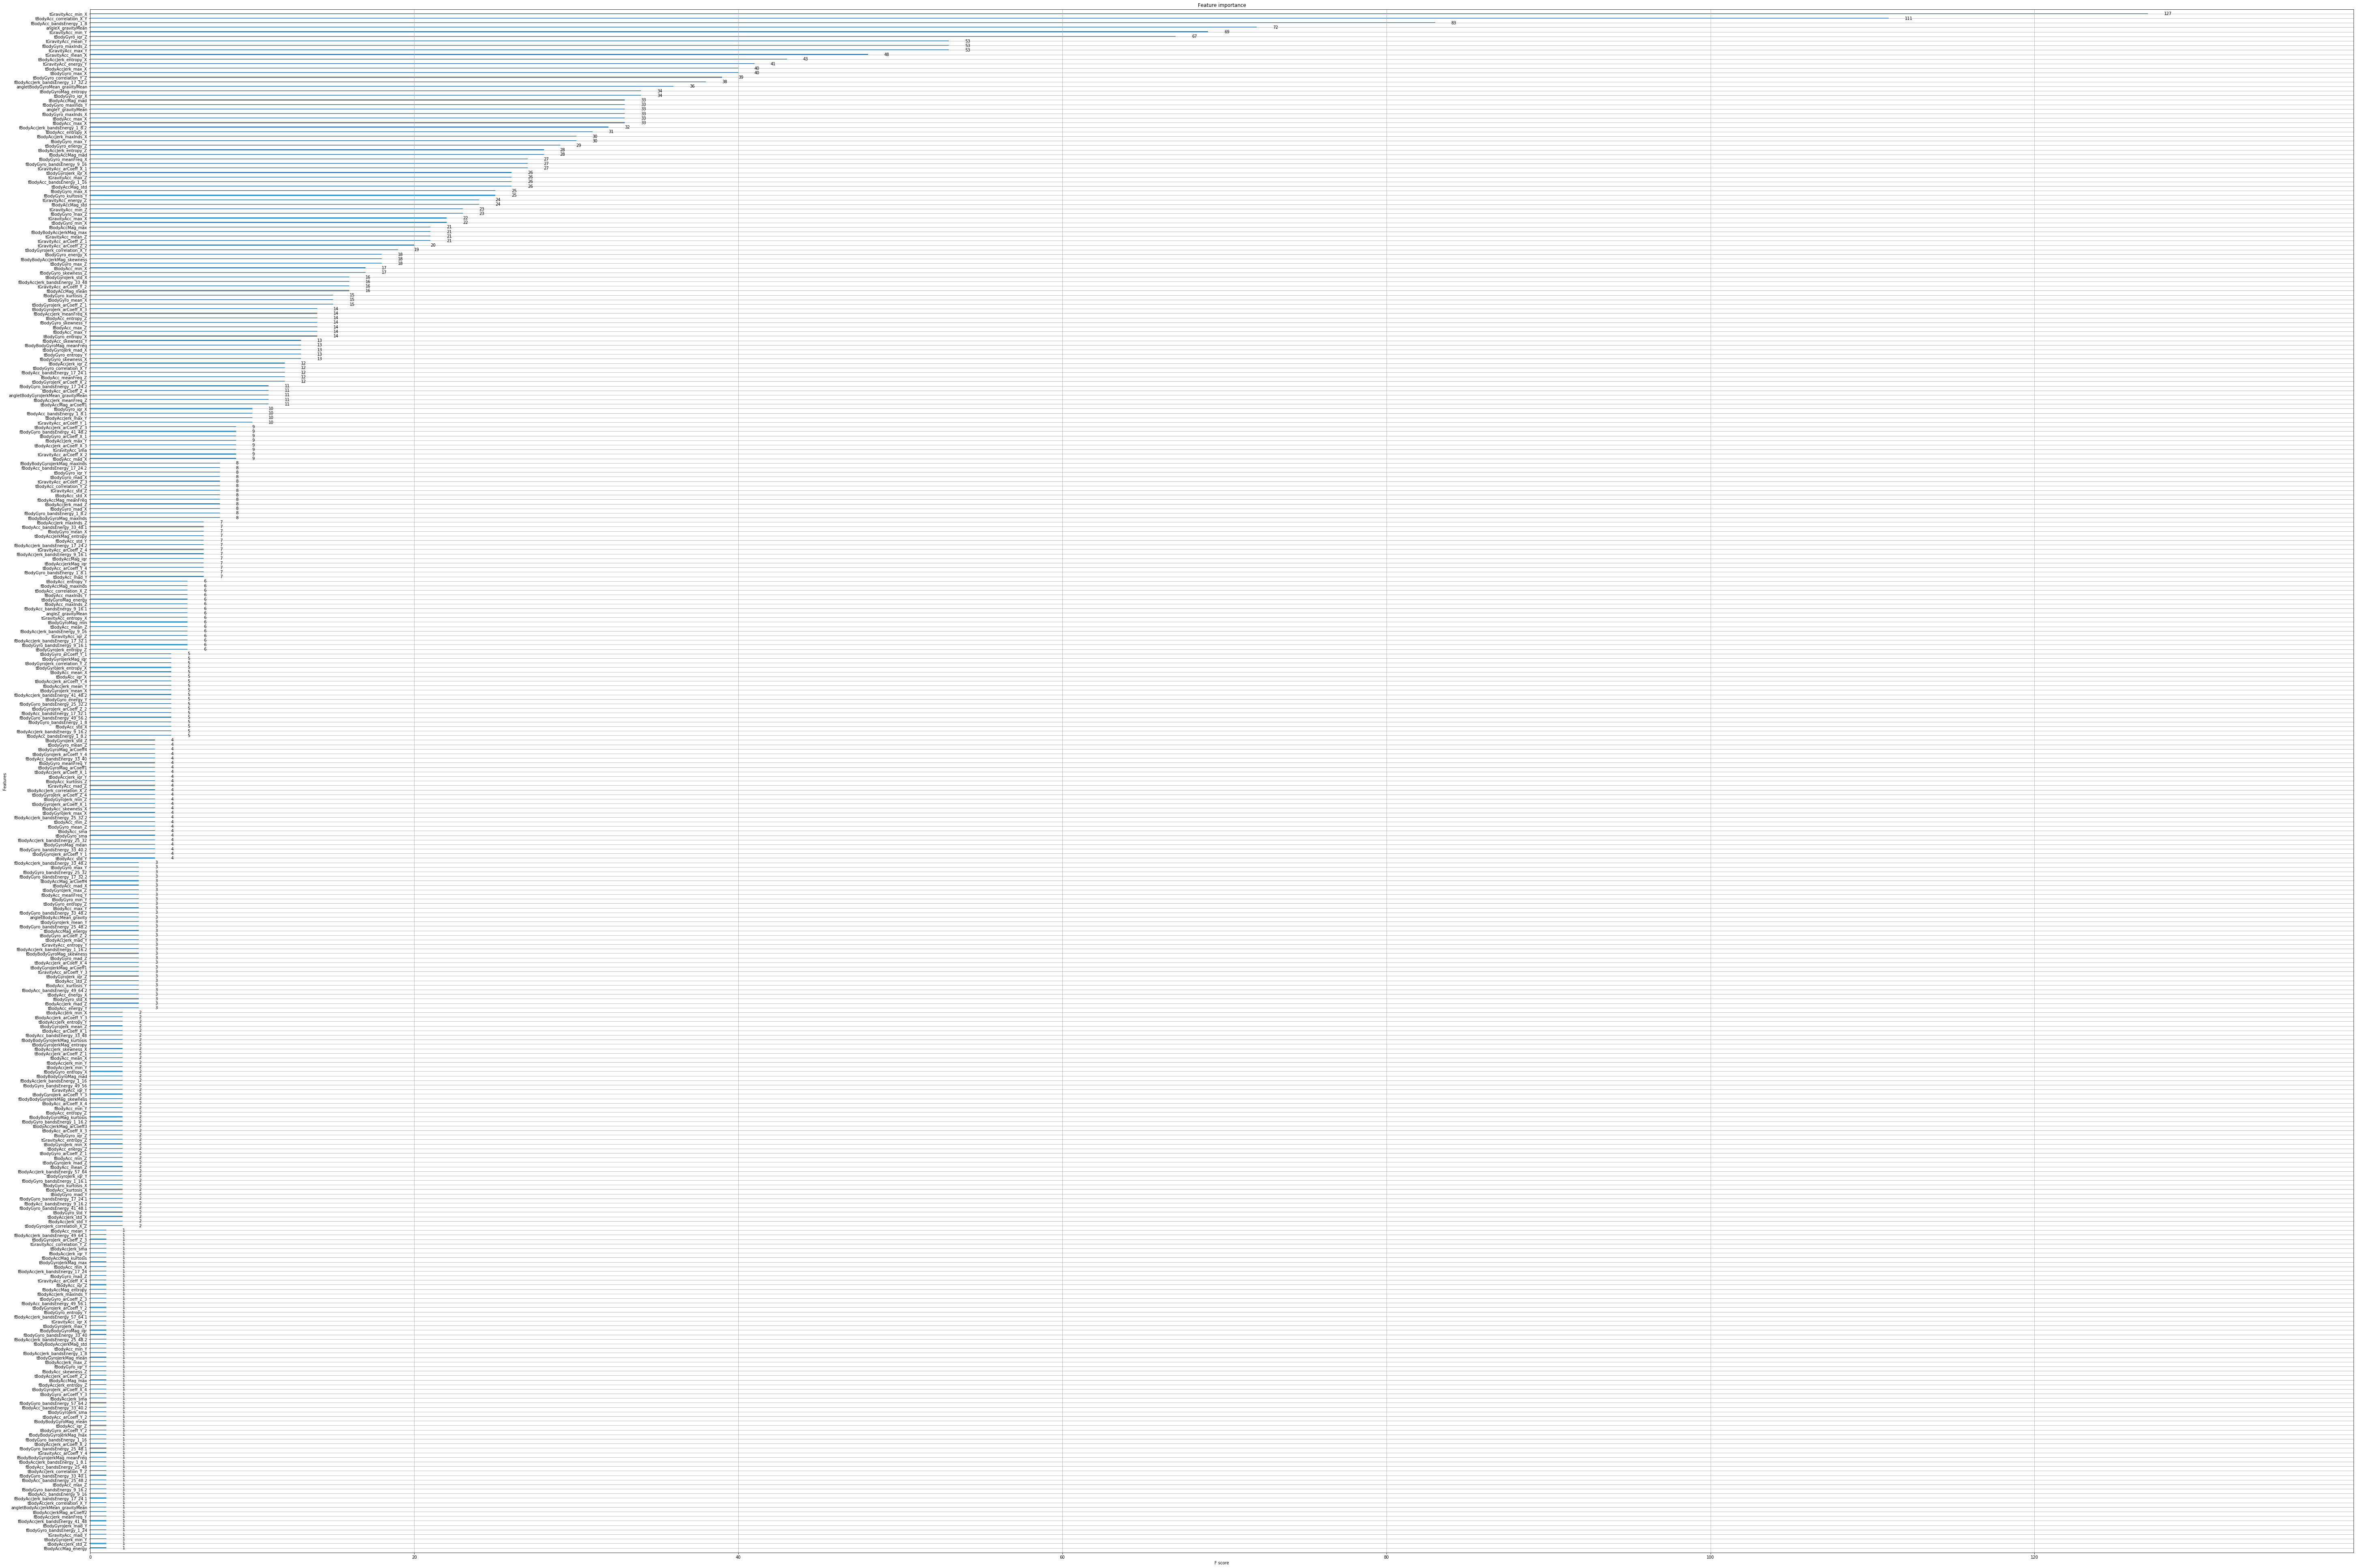

In [47]:
fig, ax = plt.subplots(figsize=(100, 70))
xgb.plot_importance(xgb_model, ax=ax)

Confusion matrix, without normalization
[[586   0   0   0   0   0]
 [  0 504  39   0   0   0]
 [  0  98 470   0   0   0]
 [  0   0   0 477   0   2]
 [  0   0   0   2 380  35]
 [  0   0   2   2   5 437]]


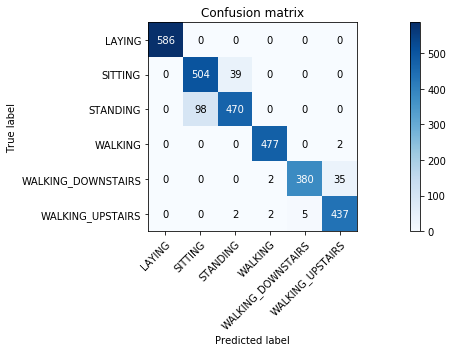

In [176]:
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.9281768  0.0718232  0.         0.         0.        ]
 [0.         0.17253521 0.82746479 0.         0.         0.        ]
 [0.         0.         0.         0.99582463 0.         0.00417537]
 [0.         0.         0.         0.00479616 0.91127098 0.08393285]
 [0.         0.         0.0044843  0.0044843  0.01121076 0.97982063]]


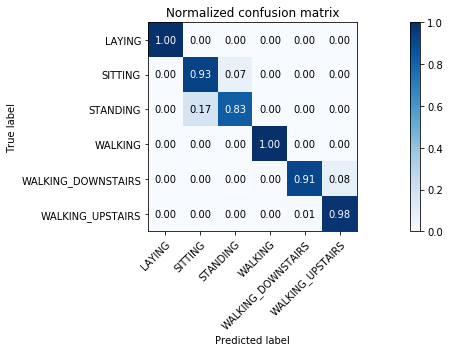

In [177]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### 2. QDA Analysis (Acuuracy and confusion matrix)

In [178]:
clf = QuadraticDiscriminantAnalysis()

In [179]:
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [180]:
y_predictt = clf.predict(X_test)

In [181]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_predictt)
accuracy

0.7643961829549194

In [185]:
count_misclassified = (y_test != y_predictt).sum()
count_misclassified

716

Confusion matrix, without normalization
[[560  26   0   0   0   0]
 [  1 490  48   0   2   2]
 [  0 241 313   6   4   4]
 [  0   0   0 179 221  79]
 [  0   0   0   0 413   4]
 [  0   0   0   5  73 368]]


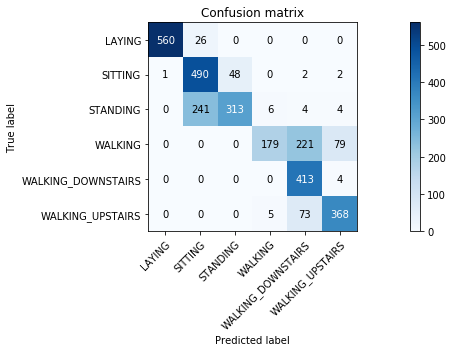

In [186]:
plot_confusion_matrix(y_test, y_predictt, classes=class_names,
                      title='Confusion matrix')

Normalized confusion matrix
[[0.9556314  0.0443686  0.         0.         0.         0.        ]
 [0.00184162 0.90239411 0.08839779 0.         0.00368324 0.00368324]
 [0.         0.42429577 0.55105634 0.01056338 0.00704225 0.00704225]
 [0.         0.         0.         0.3736952  0.46137787 0.16492693]
 [0.         0.         0.         0.         0.99040767 0.00959233]
 [0.         0.         0.         0.01121076 0.16367713 0.82511211]]


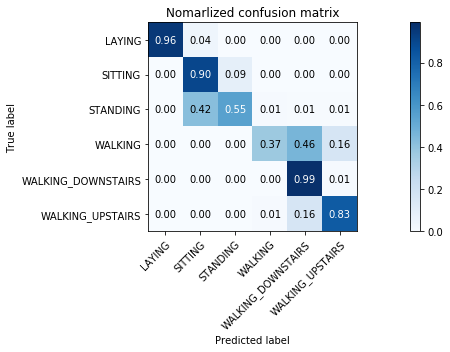

In [187]:
plot_confusion_matrix(y_test, y_predictt, classes=class_names,normalize = True,
                      title='Nomarlized confusion matrix')

## Objective2
### Vary the number of features in XGBoost
 - When 16 features are used for the prediction it has 80% accuracy.
 - When 96 features are used for the prediction it has 90% accuracy.

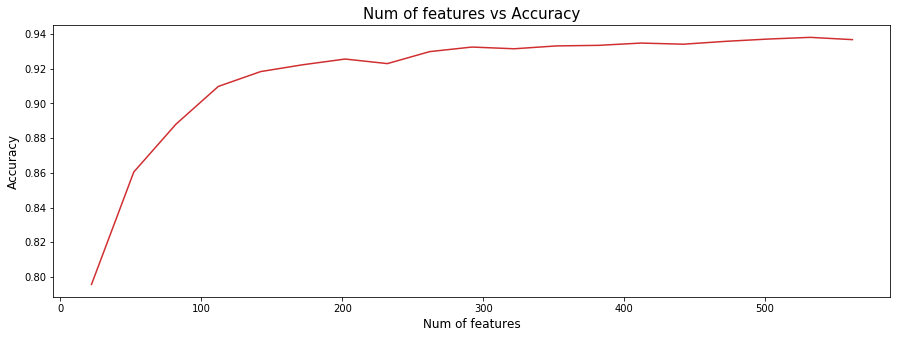

In [151]:
num_of_feature =[]
logit_acc=[]

for i in range(1,561,30):
    def logit_feature(i):
        diff_feature = df.drop(df.columns[0:i],axis=1)
        num_of_feature.append(len(diff_feature.columns))
        y= diff_feature.Activity
        X_train, X_test, y_train, y_test = train_test_split(diff_feature, y, test_size=0.295, shuffle=False)
        train = X_train
        train['Activity'] = y_train
        test= X_test
        test['Activity'] = y_test
        X_train = train.drop(['subject', 'Activity'], axis=1)
        y_train = train.Activity
        X_test = test.drop(['subject', 'Activity'], axis=1)
        y_test = test.Activity
        xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=42)
        xgb_model.fit(X_train,y_train)
        y_pred = xgb_model.predict(X_test)
        accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        return accuracy
    logit_acc.append(logit_feature(i))

plt.figure(figsize=(15,5))
plt.title('Num of features vs Accuracy', fontsize=15)
plt.xlabel('Num of features', fontsize =12)
plt.ylabel('Accuracy',fontsize =12)
plt.plot(num_of_feature, logit_acc)
plt.show()

## Additional project objective 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.295, shuffle=False)

In [65]:
train = X_train
train['Activity'] = y_train

test = X_test
test['Activity'] = y_test

In [66]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

### Built up a pipeline for PCA and XGBoost & Plot accuracy vs number of principal components

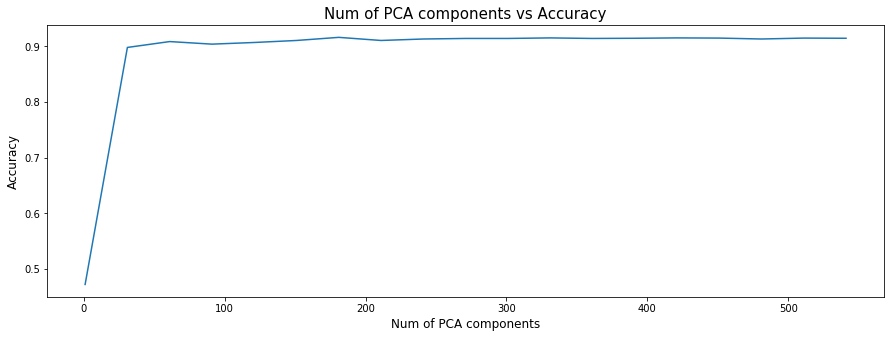

In [22]:
accuracy =[]
numfeature =[]
for i in range(1,561,30): 
    def pca_plot(i):
        XX_train = X_train.copy()
        yy_train = y_train.copy()
        XX_test = X_test.copy()
        yy_test = y_test.copy()
        pca = PCA(n_components = i)
        cls = xgb.XGBClassifier(objective="multi:softprob")
        pipe = Pipeline([('pca', pca), ('xgboost', cls)])
        pipe.fit(XX_train, yy_train)
        predictions = pipe.predict(XX_test)
        accuracy = metrics.accuracy_score(y_true=yy_test, y_pred=predictions)
        return accuracy 
    numfeature.append(i)
    accuracy.append(pca_plot(i))

plt.figure(figsize=(15,5))
plt.title('Num of PCA components vs Accuracy', fontsize=15)
plt.xlabel('Num of PCA components', fontsize =12)
plt.ylabel('Accuracy',fontsize =12)
plt.plot(numfeature, accuracy)
plt.show()